In [28]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
df= pd.read_csv('/content/drive/MyDrive/bitcoin.csv')
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [30]:
date= df['Date']

In [31]:
df1= df[::-1]
df1

,Date,Open,High,Low,Close,Volume,Market Cap
1555,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


## **Data Analysis**

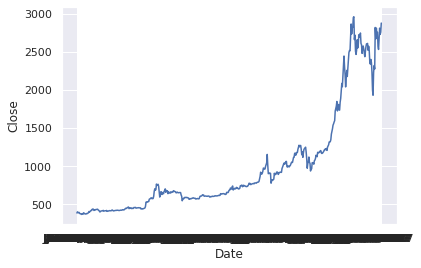

In [32]:
import seaborn as sns; sns.set()
# sns.lineplot(x="Date", y="Close", data=df)
sns.lineplot(x=df1["Date"][1000:], y=df1["Close"][1000:])

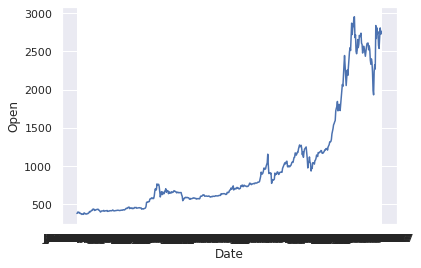

In [33]:
sns.lineplot(x=df1["Date"][1000:], y=df1["Open"][1000:])

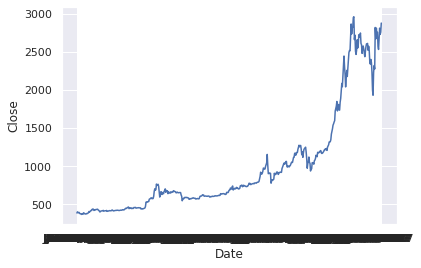

In [34]:
sns.lineplot(x=df1["Date"][1000:], y=df1['Close'][1000:])

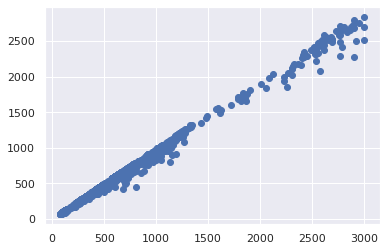

In [35]:
import matplotlib.pyplot as plt

plt.scatter(df1['High'],df1['Low'])

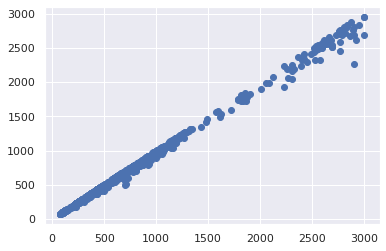

In [36]:
plt.scatter(df1['High'],df1['Open'])

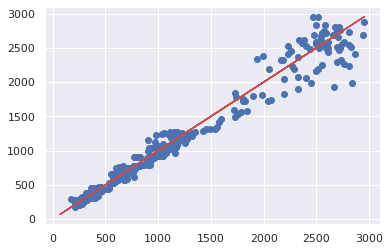

In [37]:
op=[]
for i in range(5,len(df['Open'])):
  op.append(df['Open'][i])

plt.scatter(df['Open'][:1000],op[:1000])
plt.plot(df['Open'],df['Open'], c='r')

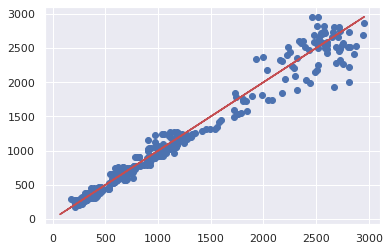

In [38]:
cl=[]
for i in range(5,len(df['Close'])):
  cl.append(df['Close'][i])

plt.scatter(df['Close'][:1000],cl[:1000])
plt.plot(df['Close'],df['Close'], c='r')

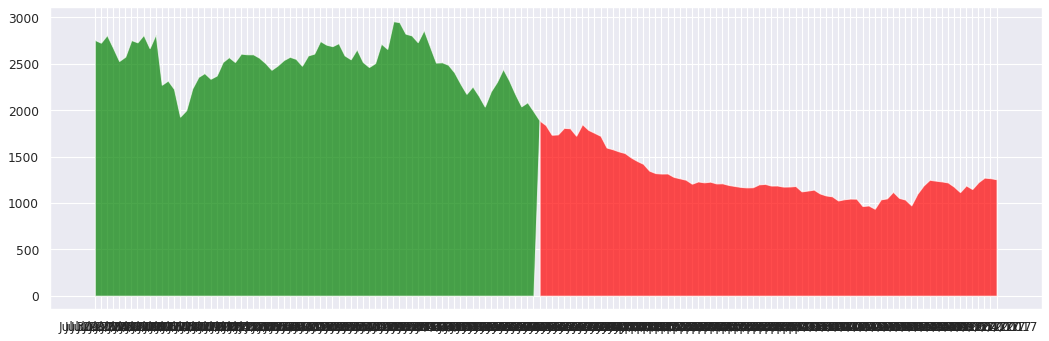

In [39]:
plt.figure(figsize=(16,5), dpi= 80)
x= df['Date'][:150]
y= df['Close'][:150]
avg= np.mean(y)
plt.fill_between(x[1:], y[1:], 0, where=y[1:] >= avg, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y[1:], 0, where=y[1:] <= avg, facecolor='red', interpolate=True, alpha=0.7)

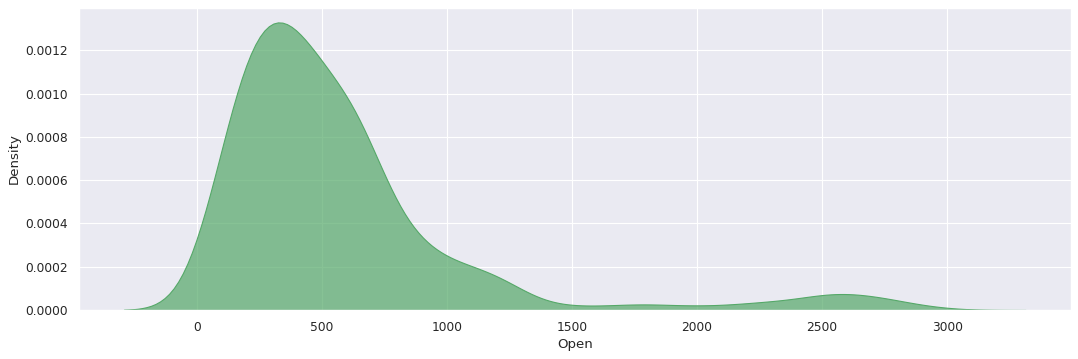

In [40]:
plt.figure(figsize=(16,5), dpi= 80)
sns.kdeplot(df['Open'], shade=True, color="g", label="Open", alpha=.7)

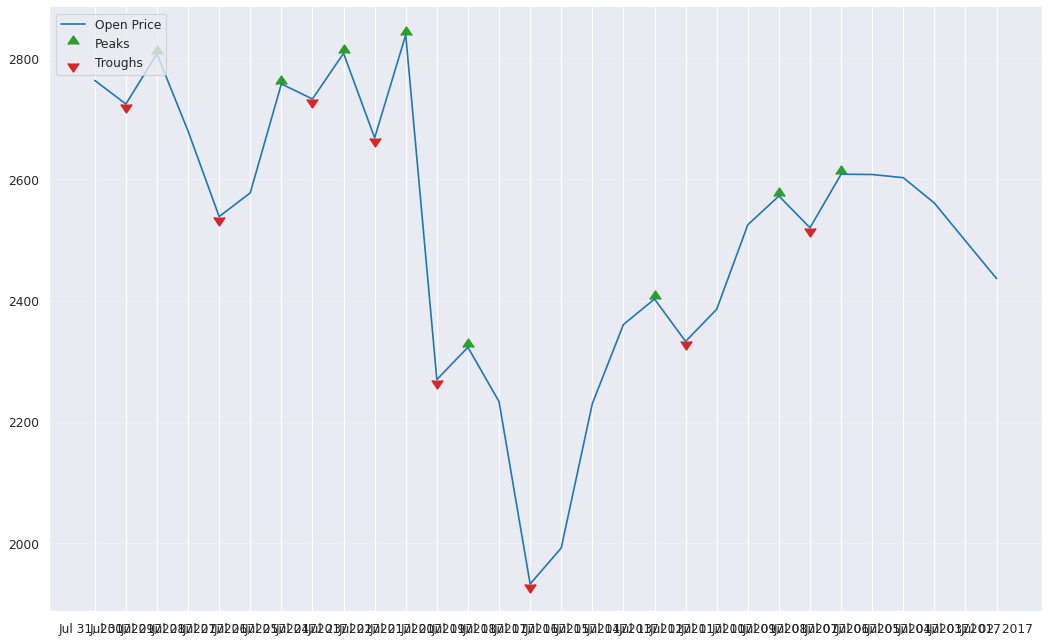

In [41]:
import matplotlib as mpl
data = df['Open'][:30].values
doublediff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

plt.figure(figsize=(16,10), dpi= 80)
plt.plot(df['Date'][:30], df['Open'][:30], color='tab:blue', label='Open Price')
plt.scatter(df.Date[peak_locations], df.Open[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(df.Date[trough_locations], df.Open[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')

plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()

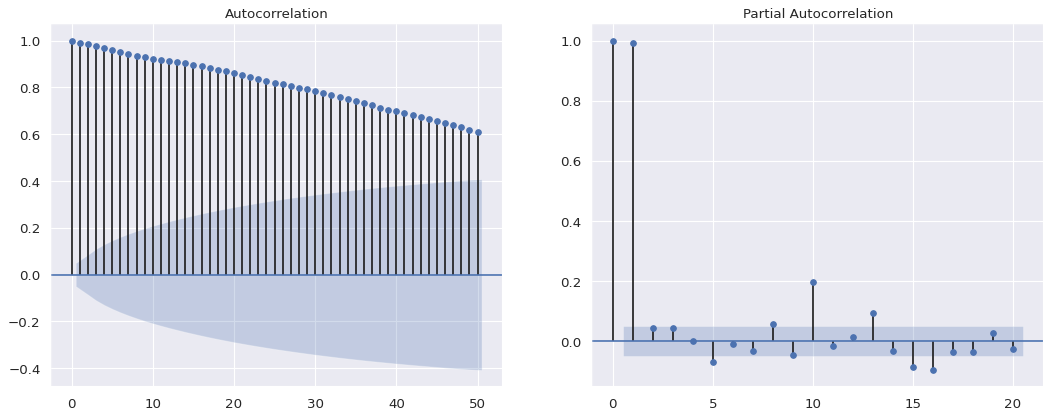

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(df['Open'].tolist(), ax=ax1, lags=50)
plot_pacf(df['Open'].tolist(), ax=ax2, lags=20)

# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [43]:
from datetime import datetime
def days(d1,d2):
  date_format = "%b %d, %Y"
  a = datetime.strptime(d1, date_format)
  b = datetime.strptime(d2, date_format)
  delta = b - a
  return delta.days

print(days('Apr 30, 2013','Jul 31, 2017'))

1553


In [44]:
d1= 	'Jul 31, 2017'

d2= 'Aug 2, 2017'

num = days(d1,d2)

In [45]:
if(num>0):
  df['open_pred']= df[['Open']].shift(num)

In [46]:
df

,Date,Open,High,Low,Close,Volume,Market Cap,open_pred
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",NaN
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",NaN
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",2763.24
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",2724.39
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",2807.02
...,...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000",98.10
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000",106.25
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000",116.38
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000",139.00


In [47]:
df= df.dropna()
df

,Date,Open,High,Low,Close,Volume,Market Cap,open_pred
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",2763.24
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",2724.39
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",2807.02
5,"Jul 26, 2017",2577.77,2610.76,2450.80,2529.45,"937,404,000","42,455,000,000",2679.73
6,"Jul 25, 2017",2757.50,2768.08,2480.96,2576.48,"1,460,090,000","45,410,100,000",2538.71
...,...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000",98.10
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000",106.25
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000",116.38
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000",139.00


In [48]:
X= df['Open'].to_numpy().reshape(-1, 1)
Y= df['open_pred'].to_numpy()

In [49]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test= tts(X,Y, test_size=0.2)

In [50]:
from sklearn.svm import SVR 
svr_rbf= SVR(kernel='rbf',C=1e3, gamma=0.00001)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, gamma=1e-05)

In [51]:
y_pred=svr_rbf.predict(x_test)
from sklearn.metrics import mean_absolute_percentage_error

print(mean_absolute_percentage_error(y_pred,y_test))

0.04376705109135468


In [61]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred,y_test))

3551.592055449704


In [62]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_pred,y_test))

27.174058622569476


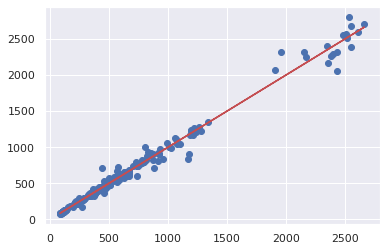

In [58]:
plt.scatter(y_pred,y_test)
plt.plot(y_pred,y_pred, c='r')

In [64]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x_train, y_train)
y_pred= neigh.predict(x_test)

In [65]:
print(mean_absolute_percentage_error(y_test, y_pred))

0.05397182395022875


In [66]:
print(mean_absolute_error(y_test, y_pred))

32.904758842443734


In [67]:
print(mean_squared_error(y_test, y_pred))

4223.793566398715


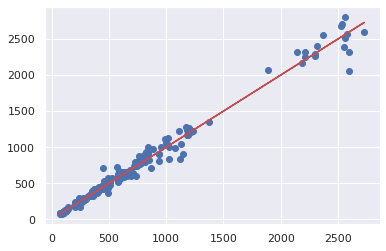

In [68]:
plt.scatter(y_pred,y_test)
plt.plot(y_pred,y_pred, c='r')

In [69]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train,y_train)
y_pred= regr.predict(x_test)

In [70]:
print(mean_absolute_percentage_error(y_test, y_pred))

0.41482199268306835


In [71]:
print(mean_absolute_error(y_test, y_pred))

131.93628687272542


In [72]:
print(mean_squared_error(y_test,y_pred))

26374.287467909886


## Model Comparison

In [77]:
from tabulate import tabulate
data=[['MEAN ABSOLUTE PERCENTAGE ERROR',0.0437,0.0539,0.4148],
      ['MEAN ABSOLUTE ERROR',27.17,32.90,131.93],
      ['MEAN SQUARED ERROR',3551.5,4223.7,26374.2]
      ]
head=['Metrics','SVR','KNN','RandomForest']
print(tabulate(data, headers=head, tablefmt="grid"))

+--------------------------------+-----------+-----------+----------------+
| Metrics                        |       SVR |       KNN |   RandomForest |
+================================+===========+===========+================+
| MEAN ABSOLUTE PERCENTAGE ERROR |    0.0437 |    0.0539 |         0.4148 |
+--------------------------------+-----------+-----------+----------------+
| MEAN ABSOLUTE ERROR            |   27.17   |   32.9    |       131.93   |
+--------------------------------+-----------+-----------+----------------+
| MEAN SQUARED ERROR             | 3551.5    | 4223.7    |     26374.2    |
+--------------------------------+-----------+-----------+----------------+


## Function to Predict Open Price on a Particular Date

In [53]:
ope= svr_rbf.predict(np.array(2763.24).reshape(-1, 1))

In [54]:
if num<0:
  print(df['Open'][-num])
elif num>1500:
  print("duration limit exceeded")
else:
  print(ope)

[2722.05151051]
